# Analisis de componentes principales o ***PCA***

El analisis de componentes principales corresponde a una técnica de algebra lineal en la que se permite identificar los valores (eigenValues) y vectores (eigenVectors) propios de la matriz de covarianza, para generar una reduccion de dimensionalidad.

De manera que los eigenVectors representan las **direcciones** a lo largo de las cuales se perciben mayor información o cantidad de varianza (componentes principales de la matriz de covarianza) y los eigenValues responden proporcionalmente a la **cantidad de varianza**, se debe mencionar que para una matriz de covarianza los eigenVectors son independientes (ortogonales) unos de otros, es decir estos vectores representan nuevas variables cuya correlación es la más baja posible y así cada nueva variable es lo más representativa posible.

Estas **direcciones** corresponden a las proyecciones de las varibles originales sobre aquellas nuevas variables (eigenVectors) que cuenten con mayor cantidad de varianza (eigenValues) entre los datos originales y dicha dirección. o lo que es lo mismo:

$\Sigma$ = matriz de covarianza

$\lambda$ = eigenValue

$\vec{u}$ = eigenVector

$$D = \begin{bmatrix}
    \lambda_1 & 0 & 0 \\
    0 & ... & 0 \\
    0 & 0 & \lambda_n
\end{bmatrix} $$

$$P = \begin{bmatrix}
    \vec{u}_1 & ... & \vec{u}_n
\end{bmatrix} $$

$$P^T = \begin{bmatrix}
    \vec{u}_1 \\ ... \\ \vec{u}_n
\end{bmatrix} $$

Entonces:

$$\Sigma = P*D*P^T $$

y:

$$ var(\vec{u}_1*\vec{x}_1, ..., \vec{u}_1*\vec{x}_n) = \vec{u}_1\cdot\Sigma\cdot\vec{u}_1^T


## Ejericio practico:
### 1 Librerias

In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import shapiro

### 2 Dataframe:
Se va a trabajar con el data frame iris de seaborn.

In [60]:
df = sns.load_dataset('iris')
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### 2.1 Analisis de datos:

Para el analisis de los datos se puede realizar un analisis exploratorio, pero para este caso que ya se reconoece se simplificara meiante unicamente en analisis grafico de las variables mediante `sns.pairplot()` 

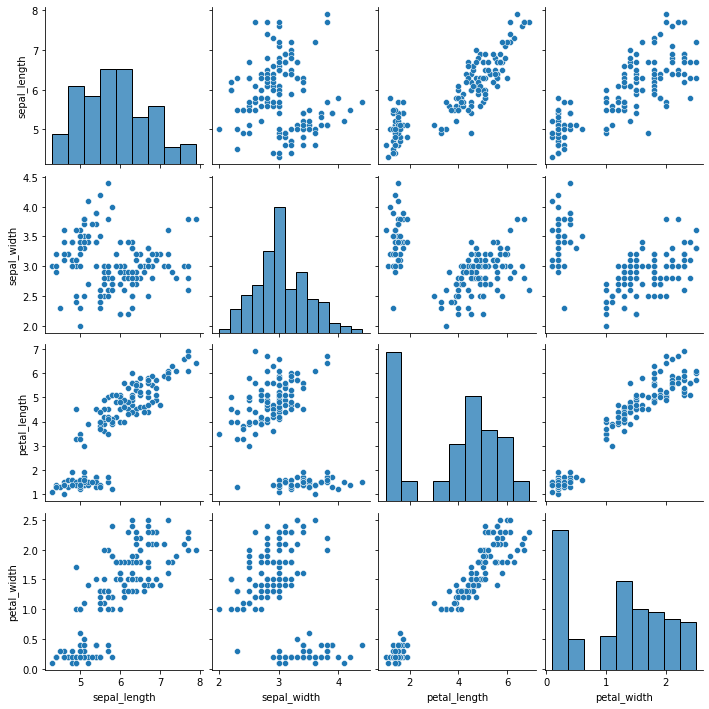

In [14]:
sns.pairplot(data= df)

De acuerdo a lo que se puede observar en la grafica anterior, se establece que las variables con mayor correlación corresponden a ancho y largo del petalo, por lo tanto se procede a realizar una grafica unica de estas dos variables.

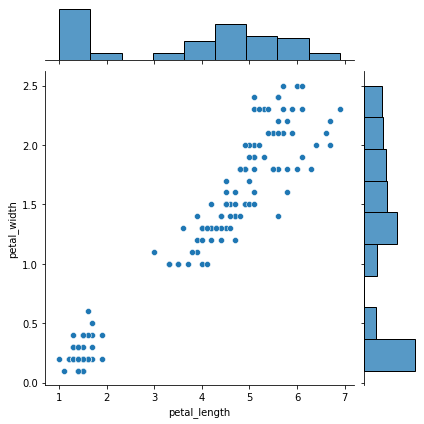

In [16]:
sns.jointplot(data=df, x='petal_length', y='petal_width')

### Priebas de normalidad:

Para poder comprobar la normalidad de cada una de las variables se puede establecer algunas pruebas de normalidad tales como:
- Shapiro: establece que la varible tiene una distribución normal si el  P_value > 0.05
- Kolmogorov-Smirnov corregida por lilliefors

Sin embargo la más utilizada es el test de shapiro.

In [86]:
dict = {}
for column in df:
    if column != 'species':
        clave=column
        shapiroTest, pValue =  shapiro(df[column])
        dict[column]= pValue
    else:
        break

for key, values in dict.items():
    print(f'La variable {key} es normal: {values>0.05}')

La variable sepal_length es normal: False
La variable sepal_width es normal: True
La variable petal_length es normal: False
La variable petal_width es normal: False


Como se observo anteriormente, solo una de las 4 variables tiene una distribución normal conforme a el test de shapiro.

### 3 Escalamiento lineal:

Para este ejercicio se realiza el escalamiento por el metodo z_score, de manera que se ignoran las varibales categoricas.

In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
trans = scaled.T

Se procede a realizar el analisis grafico con las variables escaladas así:

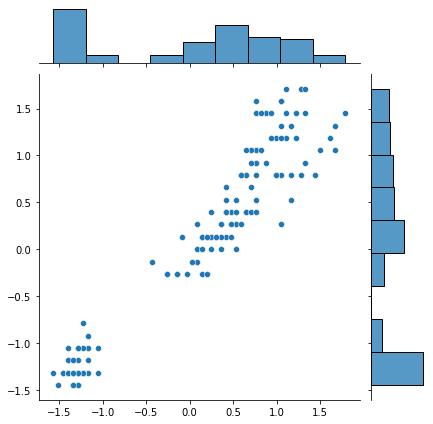

In [20]:
sns.jointplot(x=scaled[:,2], y=scaled[:,3])


por lo tanto se valida que no hay un cambio drastico en la dispersión de los datos, salvo por su reescalamiento.

### 4 matriz de covarianza:

In [9]:
covMatrix = np.cov(trans)
covMatrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

Con la matriz de covarianza se valida la hipotesis de mayor correlación entre las variables de longitud y ancho del petalo.

### 5 Calculo de eigenValues y eigenVectors:

Con la matriz de covarianza realizada se procede a realizar el calculos de los valores y vectores propios del df.

esto se realiza mediante la funcion eigen de la libreria de algebra lineal del paquete de numpy.

Se puede acceder a la documentación en: 
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html 

In [21]:
eigenValues, eigenVectors = np.linalg.eig(covMatrix)

In [33]:
print(f'los valores propios son:')
eigenValues

los valores propios son:


array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [24]:
print(f'los vectores propios son:')
eigenVectors

los vectores propios son:


array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

### 6 identificación de los componentes principales:

Como se vio anteriormente, los componentes principales son aquellos que campturan la mayor varianza, por lo tanto, se procede a calcular la varianza por cada uno de los `eigenValues`, dado que es proporcional a la varianza capturada de los datos originales

In [42]:
variance_explained = {}
variance = []
for i in eigenValues:
    var = i/sum(eigenValues)*100
    clave = "componente principal "+str(round(i, 2))
    variance_explained[clave]=str(round(var,2))+' %'
    variance.append(var)

print(variance_explained)
print('')
print(variance)

{'componente principal 2.94': '72.96 %', 'componente principal 0.92': '22.85 %', 'componente principal 0.15': '3.67 %', 'componente principal 0.02': '0.52 %'}

[72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]


Con esto podemos identificar que las primeras 3 componentes principales agrupan el **99.48 %** de la varianza de los datos principales.

### 7 Reduccion de dimensionalidad:
Para la reduccion de la dimensionalidad se ejecuta la funcion PCA de la libreria decomposition del paquete scikit-learn:

Se puede acceder a la documentación en:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

#### 7.1 Reduccion:

In [44]:
pca = PCA(n_components=2)

pca.fit(scaled)

PCA(n_components=2)

Con el codigo anterior se procede a realizar la reduccion de dimensionalidad a dos dimensiones utilizando los datos escalados.

y acontinuación con el metodo `.explained_variance_ratio_`, se puede obtener la varianza explicada por las dos componentes principales.

In [47]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Con esto comprobamos que las componentes principales seleccionadas son aquellas que capturan la mayor cantidad de varianza de los datos originales.

#### 7.2 Nuevas variables:

Ahora se procede a realizar la construccion de los nuevos datos producto de la reduccion de los datos originales luego de su escalado.

In [50]:
principalComponents = pca.transform(scaled)
principalComponents.shape

(150, 2)

Con esto lo que hacemos es coger los datos originales ya escalados y transformarlos conforme a los 2 componentes principales identificados.

y mediante shape verificamos que se crean las nuevas variables con los 150 registros tal y como se contaba originalmente en el dataframe.

In [54]:
df1 = df.copy()
df1['PCA_1'] = principalComponents[:,0]
df1['PCA_2'] = principalComponents[:,1]
df1.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,PCA_1,PCA_2
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835


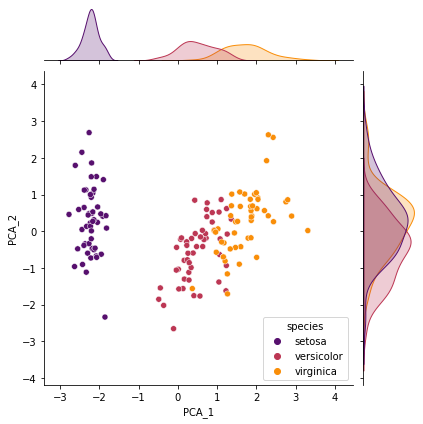

In [56]:
sns.jointplot(data=df1, x='PCA_1', y='PCA_2', palette='inferno', hue='species')